In [2]:
import pandas as pd

data = pd.read_csv('fraud_credit_card.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### 1 .Preprocessing the Dataset

In [4]:
data = data.drop(columns = ['Unnamed: 0'],axis=1)
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
data.shape

(555719, 22)

In [8]:
data.info()
# There is no missing values in the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [10]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [12]:
print(data[data.duplicated()==True])

Empty DataFrame
Columns: [trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 22 columns]


In [13]:
print(data.isnull().sum())
# There is no null values in the dataset

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [14]:
# Conversion of the data type from object to 'DateTime'
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data.head()

C:\Users\yoges\AppData\Local\Temp\ipykernel_23364\456504805.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  float64       
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [16]:
# Encoding the Categorical Data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'gender', 'state', 'job']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])



In [18]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:00,2.291160e+15,319,10,2.86,Jeff,Elliott,1,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,275,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:00,3.573030e+15,591,10,29.84,Joanne,Williams,0,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,392,17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:00,3.598220e+15,611,5,41.28,Ashley,Lopez,0,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,259,21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:00,3.591920e+15,222,9,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,407,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:00,3.526830e+15,292,13,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,196,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [20]:
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
data['age'] = (pd.to_datetime('today') - data['dob']).dt.days // 365

C:\Users\yoges\AppData\Local\Temp\ipykernel_23364\3858592911.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['dob'] = pd.to_datetime(data['dob'], errors='coerce')


In [23]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2020-06-21 12:14:00,2.291160e+15,319,10,2.86,Jeff,Elliott,1,351 Darlene Green,Columbia,...,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,56
1,2020-06-21 12:14:00,3.573030e+15,591,10,29.84,Joanne,Williams,0,3638 Marsh Union,Altonah,...,-110.4360,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,34
2,2020-06-21 12:14:00,3.598220e+15,611,5,41.28,Ashley,Lopez,0,9333 Valentine Point,Bellmore,...,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,54
3,2020-06-21 12:15:00,3.591920e+15,222,9,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,37
4,2020-06-21 12:15:00,3.526830e+15,292,13,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,69


In [26]:
cols = ['first', 'last', 'street', 'city', 'zip', 'dob', 'trans_date_trans_time', 'trans_num']
data = data.drop(columns=cols)

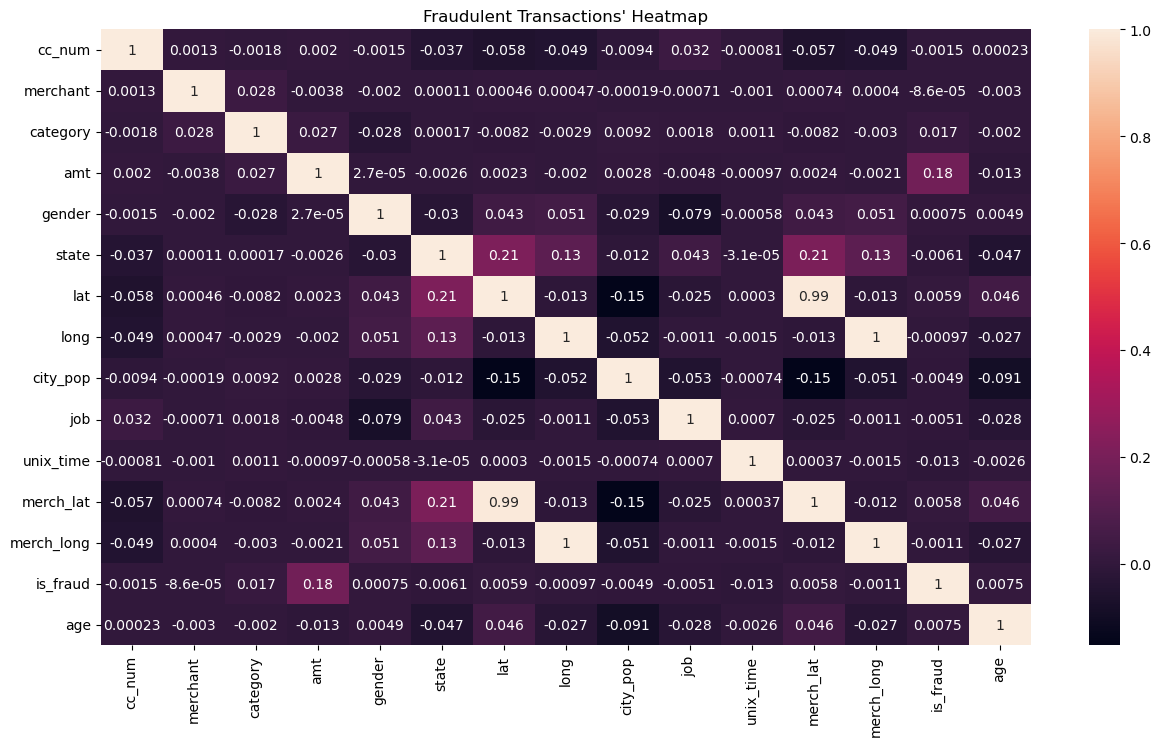

In [27]:
# Checking the Correlation between the Attributes
import matplotlib.pyplot as plt
import seaborn as sns
data_test = data.corr() 
plt.figure(figsize=(15, 8))
sns.heatmap(data_test, annot=True)
plt.title("Fraudulent Transactions' Heatmap")
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      555719 non-null  float64
 1   merchant    555719 non-null  int32  
 2   category    555719 non-null  int32  
 3   amt         555719 non-null  float64
 4   gender      555719 non-null  int32  
 5   state       555719 non-null  int32  
 6   lat         555719 non-null  float64
 7   long        555719 non-null  float64
 8   city_pop    555719 non-null  int64  
 9   job         555719 non-null  int32  
 10  unix_time   555719 non-null  int64  
 11  merch_lat   555719 non-null  float64
 12  merch_long  555719 non-null  float64
 13  is_fraud    555719 non-null  int64  
 14  age         555719 non-null  int64  
dtypes: float64(6), int32(5), int64(4)
memory usage: 53.0 MB


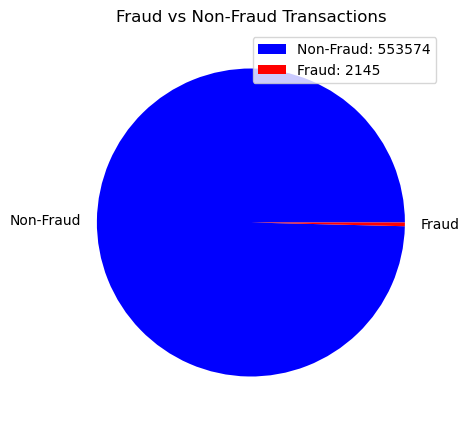

In [34]:
# Visualizing the Number of Fraudulent and Non fraudulent transactions
fraud_counts = data['is_fraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
counts = [f"{label}: {count}" for label, count in zip(labels, fraud_counts)]

plt.figure(figsize=(5, 5))
plt.pie(fraud_counts, labels=labels, colors=['blue', 'red'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.legend(counts, loc='upper right')
plt.show()

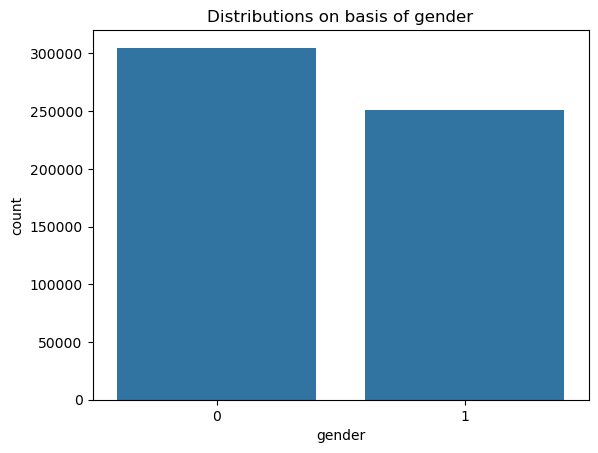

In [36]:
#Gender - Male: 1, Female: 0 
sns.countplot(x='gender',data=data)
plt.title("Distributions on basis of gender")
plt.show()

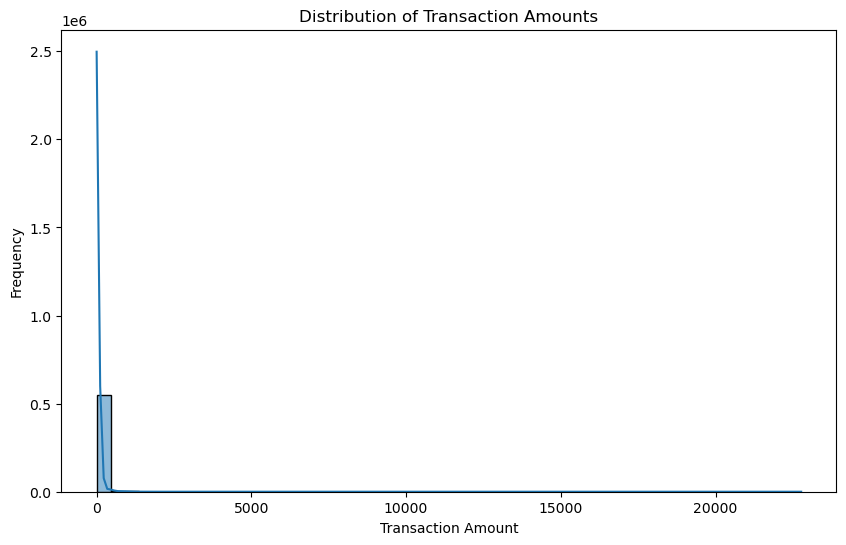

In [37]:
# Distribution of the Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

from collections import Counter
print("Class distribution after applying SMOTE:", Counter(y_train_balanced))


Class distribution after applying SMOTE: Counter({0: 387498, 1: 387498})


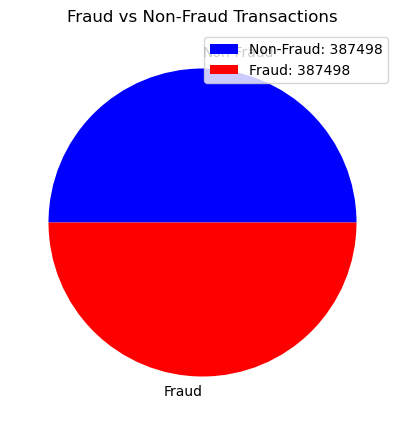

In [40]:
# After Applying the SMOTE - Handling the Target class Imbalance
fraud_counts = y_train_balanced.value_counts()
labels = ['Non-Fraud', 'Fraud']
counts = [f"{label}: {count}" for label, count in zip(labels, fraud_counts)]

plt.figure(figsize=(5, 5))
plt.pie(fraud_counts, labels=labels, colors=['blue', 'red'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.legend(counts, loc='upper right')
plt.show()

In [41]:
y_test.shape

(166716,)

### 2. Decision Tree analysis

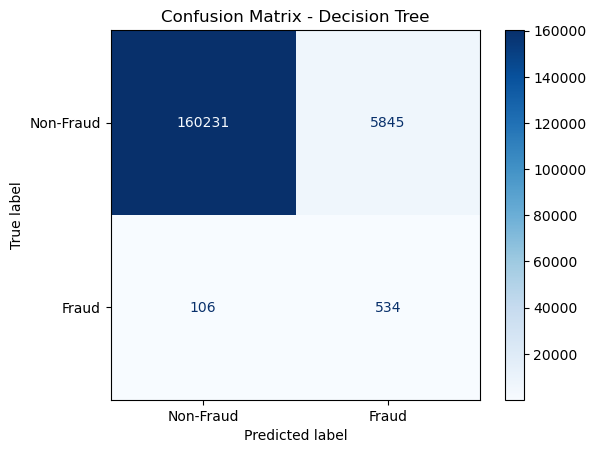

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    166076
           1       0.08      0.83      0.15       640

    accuracy                           0.96    166716
   macro avg       0.54      0.90      0.57    166716
weighted avg       1.00      0.96      0.98    166716



In [38]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dtree_model = DecisionTreeClassifier(class_weight='balanced',max_depth=15, min_samples_split=15, min_samples_leaf=10, random_state=42)
dtree_model.fit(X_train_balanced, y_train_balanced)

y_pred = dtree_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))


### RANDOM FOREST CLASSIFIER

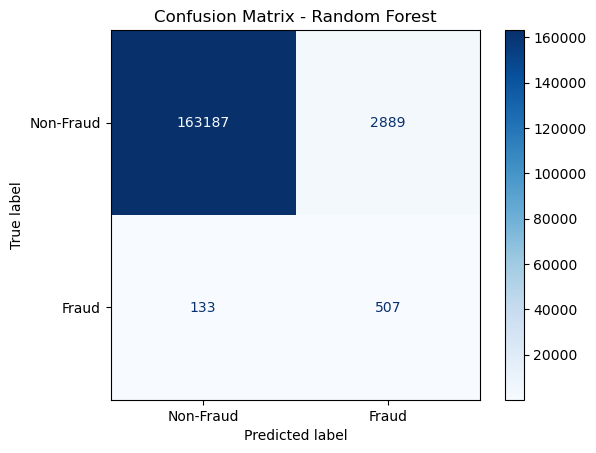

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    166076
           1       0.15      0.79      0.25       640

    accuracy                           0.98    166716
   macro avg       0.57      0.89      0.62    166716
weighted avg       1.00      0.98      0.99    166716



In [76]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)


y_pred_rf = rf_model.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Non-Fraud', 'Fraud'])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))


#### Applying Ensembling approach for Improving the accuracy of the Model

In [80]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.4/124.9 MB 5.6 MB/s eta 0:00:23
   ---------------------------------------- 1.2/124.9 MB 11.1 MB/s eta 0:00:12
    --------------------------------------- 2.1/124.9 MB 13.3 MB/s eta 0:00:10
    --------------------------------------- 2.9/124.9 MB 14.4 MB/s eta 0:00:09
   - -------------------------------------- 3.8/124.9 MB 15.2 MB/s eta 0:00:08
   - -------------------------------------- 4.7/124.9 MB 15.9 MB/s eta 0:00:08
   - -------------------------------------- 5.6/124.9 MB 16.3 MB/s eta 0:00:08
   -- ------------------------------------- 6.5/124.9 MB 16.6 MB/s eta 0:00:08
   -- ------------------------------------- 7.4/124.9 MB 16.8 MB/s eta 0:00:07
   -- ------------------------------------- 8.2/124.9 MB 17.0 MB/s eta 0:00:07
   -- ------------------------------------- 9.1/124.9 MB 17.0 

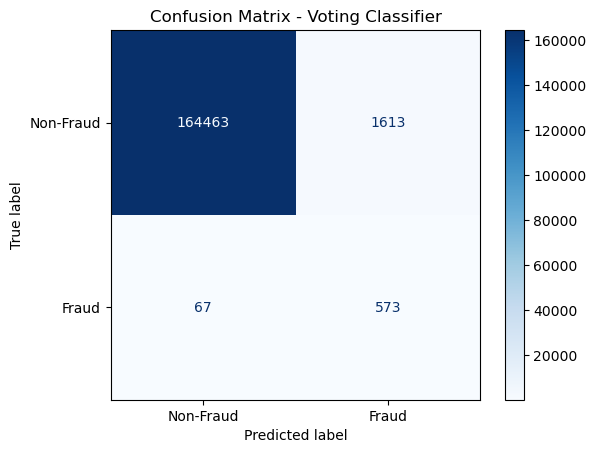

Classification Report - Voting Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    166076
           1       0.26      0.90      0.41       640

    accuracy                           0.99    166716
   macro avg       0.63      0.94      0.70    166716
weighted avg       1.00      0.99      0.99    166716



In [84]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100, 
    max_depth=10,
    random_state=42
)

xgb_model = XGBClassifier(
    scale_pos_weight=(len(y_train_balanced) / y_train_balanced.sum()),
    n_estimators=100, 
    random_state=42
)

# Creating a Voting Classifier
voting_model = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('xgboost', xgb_model)
    ],
    voting='soft' 
)


voting_model.fit(X_train_balanced, y_train_balanced)


y_pred_voting = voting_model.predict(X_test)


conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
disp_voting = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_voting, display_labels=['Non-Fraud', 'Fraud'])
disp_voting.plot(cmap='Blues')
plt.title("Confusion Matrix - Voting Classifier")
plt.show()

print("Classification Report - Voting Classifier:")
print(classification_report(y_test, y_pred_voting))


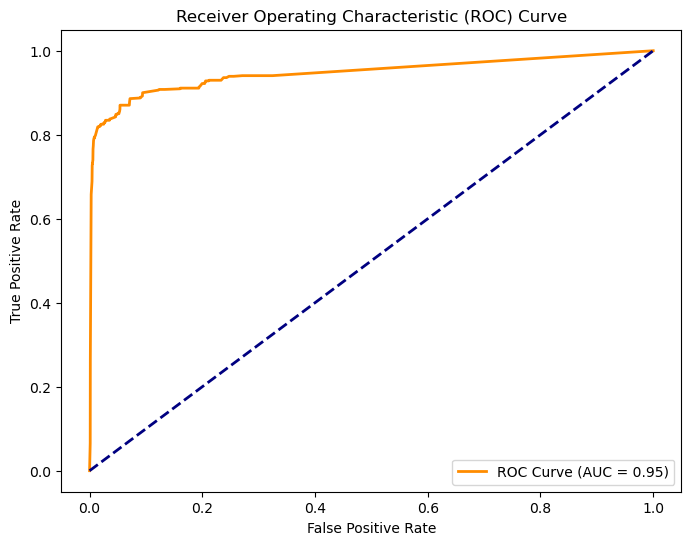

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = dtree_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Fine-tuning of the Model:
1. **max_depth**:
   - This hyper-parameter is used for setting the maximum depth that the dataset is allowed to grow.
   - The higher depth is used to reduce the training error and captures the complex patterns of the dataset.
   - And we should be aware of the max_depth because some times the higher depths lead to overfitting.

2. **min_sample_split**: It defines the number of samples that are tend to split and if we set the min samples split less than that of the number of samples then this tree won't split and it will lead to the leaf node.
3. **min_samples_leaf**: It defines the number of samples that needs to be in the leaf nodes. And this parameter helps in stopping the split of trees as it reaches the threshold.

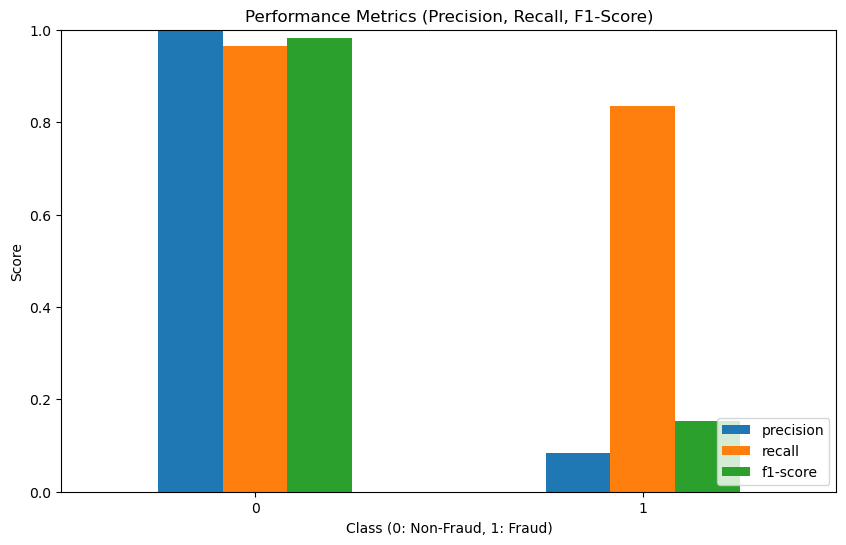

In [72]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']  

metrics_df.loc[classes, metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics (Precision, Recall, F1-Score)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.ylim(0, 1) 
plt.show()

#### To test whether it overfits or not?

In [61]:
from sklearn.metrics import accuracy_score

y_train_pred = dtree_model.predict(X_train_balanced)
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

if train_accuracy > test_accuracy + 0.1:
    # Here this 0.1 is a threshold
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Training Accuracy: 0.97
Test Accuracy: 0.96
The model is not overfitting.


### 3.Logistic Regression Analysis

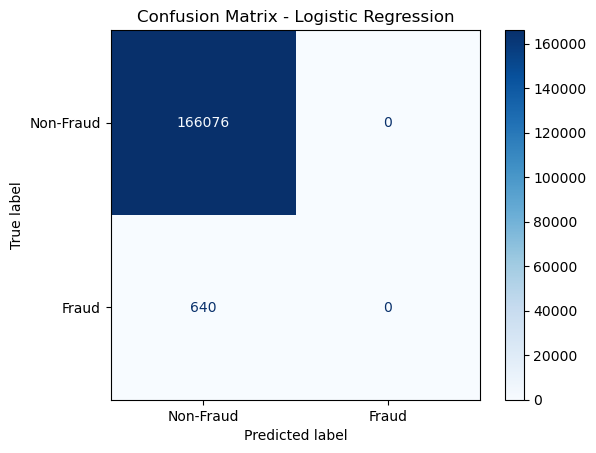

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.00      0.00      0.00       640

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716



C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

logreg_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg_model.fit(X_train_balanced, y_train_balanced)

y_pred_logreg = logreg_model.predict(X_test)

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logreg, display_labels=['Non-Fraud', 'Fraud'])
disp_logreg.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))


The Hyper parameter tuning done here are:
- **class_weight** = 'balanced' which purposefully mentioned for handling the class imbalance nature of the dataset.
- **random_state** = 42 this sets that the results are reproducible and it will yield the same result no matter how many times we run this cell.
- **max_iter** = 1000 represents the no. of iterations this algorithm run to converge the optimal modal parameters.

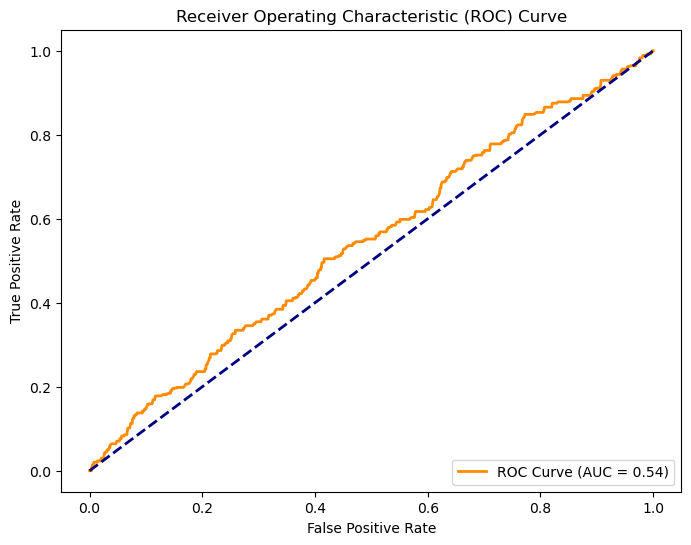

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = logreg_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

y_train_pred = logreg_model.predict(X_train_balanced)
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)

test_accuracy = accuracy_score(y_test, y_pred_logreg)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

if train_accuracy > test_accuracy + 0.1:
    # Here this 0.1 is a threshold
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Training Accuracy: 0.50
Test Accuracy: 1.00
The model is not overfitting.


C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


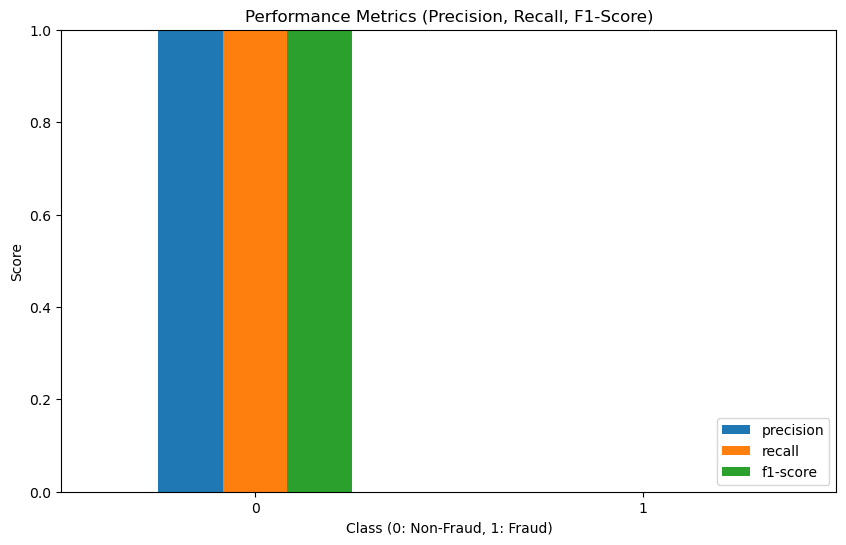

In [60]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

report = classification_report(y_test, y_pred_logreg, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']  

metrics_df.loc[classes, metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics (Precision, Recall, F1-Score)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.ylim(0, 1) 
plt.show()

### 4. KNN ALgorithm

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report - KNN:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    166076
           1       0.24      0.74      0.36       640

    accuracy                           0.99    166716
   macro avg       0.62      0.87      0.68    166716
weighted avg       1.00      0.99      0.99    166716



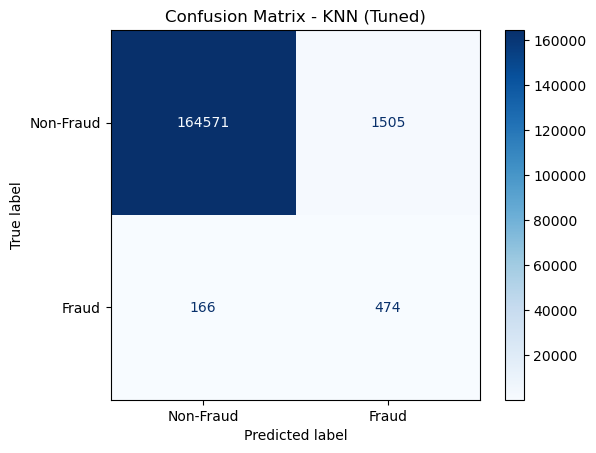

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_balanced)

best_knn_model = grid_search.best_estimator_

y_pred_knn = best_knn_model.predict(X_test_scaled)

print("Best Hyperparameters:", grid_search.best_params_)
print("Classification Report - KNN:")
print(classification_report(y_test, y_pred_knn, zero_division=1))


conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=['Non-Fraud', 'Fraud'])
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN (Tuned)")
plt.show()


The hyperparameters here are:
- **n_neighbours**: This fixes the no. of neighbours to consider for the classification
- **weights**: 'uniform' - Gives the same weight for all the neighbours, 'distance' - gives the inverse of that distance.
- **metric**: 'euclidean' & 'manhattan' the distance metric which is to use 

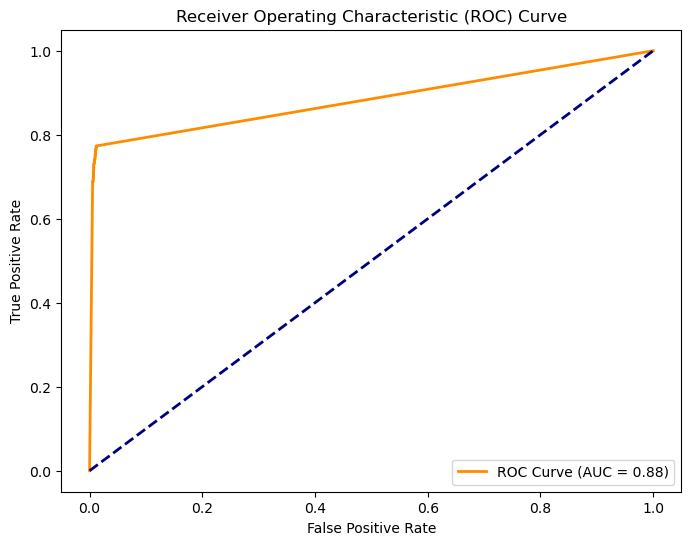

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_knn = best_knn_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = roc_auc_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### 5. Support Vector Machine

Classification Report - SVM:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    166076
           1       0.07      0.76      0.13       640

    accuracy                           0.96    166716
   macro avg       0.53      0.86      0.55    166716
weighted avg       1.00      0.96      0.98    166716



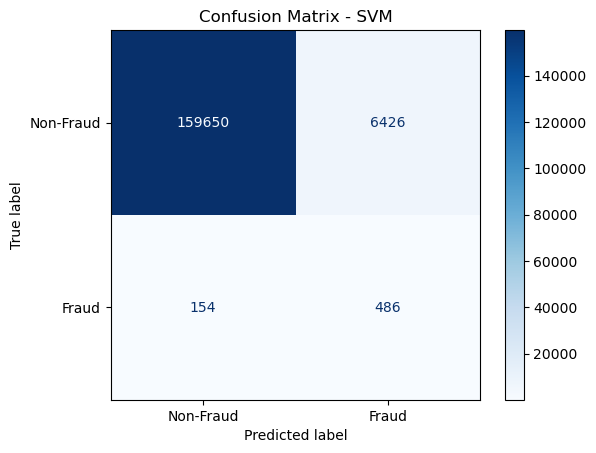

In [46]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(C=1, kernel='rbf', gamma='scale', random_state=42)


svm_model.fit(X_train_scaled, y_train_balanced)


y_pred_svm = svm_model.predict(X_test_scaled)


print("Classification Report - SVM:")
print(classification_report(y_test, y_pred_svm, zero_division=1))


conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=['Non-Fraud', 'Fraud'])
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


The hyper parameters here are:
- c: It is a regualarization parameter which is used to make the decision surface smoother.
- kernel: It specifies the kernal type which we can use for the SVM
- gamma: It represents the kernel coefficient

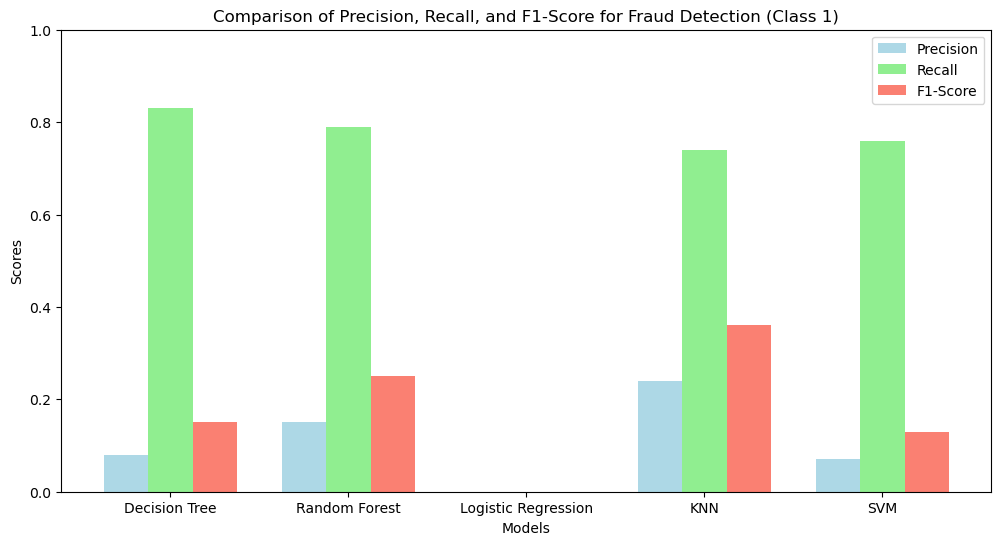

In [49]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN', 'SVM']
precision = [0.08, 0.15, 0.00, 0.24, 0.07]
recall = [0.83, 0.79, 0.00, 0.74, 0.76]
f1_score = [0.15, 0.25, 0.00, 0.36, 0.13]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision', color='lightblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_score, width, label='F1-Score', color='salmon')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Precision, Recall, and F1-Score for Fraud Detection (Class 1)')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.show()


Out of the above compared models
- Best model is KNN due to its highest F1 score I got as 0.36 in handling the fraud cases and it gives a better balancing b/w precision and recall.

####
#### Pros of Decision Tree:
- It is relatively easier to interpret and it is visualized as a simple flow chart.
- It will be robust to the outliers in the dataset.
- It will properly handle with the missing values and it is better suitable for the non linear models.

#### Cons of Decision Tree: 
- Overfitting is a common issue here.
- It will be unstable when there is a change in the data or when there is an unstabilitiy in the noise.

#### Pros of Logistic Regression: 
- Suitable for Binary Classification
- Works well when the relationship between features and the target is approximately linear.

#### Cons of Logistic Regression: 
- Less effective for complex data pattern
- Struggle with overfitting

#### Pros of KNN: 
- Simple and Intuitive no matter what distribution it follows
- Useful for Large Datasets when neighbours is large and when non linear relationships.

#### Cons of KNN:
- Computationally expensive with memory power.
- Sensitive to feature scaling.

#### Pros of SVM:
- Effective for high Dimensional data and with a clear margin seperation.
- Can effectively handle overfitting.
 
#### Cons of SVM:
- Runs and takes more time for large datasets.
- Less effective during class overlap and it will find difficult to interpret.

#### Pros of Random Forest:
- Handle higher dim data and handles overfitting by the ensembling approach.
- Handles missing values perfectly.


#### Cons of Random Forest:
- Computationally intensive and slower with many trees.
- Less interpretable compared to Decision tree and SVM.